# Data Processsing 

## Using EEG data processed by Krigolson Lab and performing further processing to fit into a machine learning model
### Principal Component Analysis is used for performing dimensionality reduction on 30-channel EEG data 

In [13]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os, os.path
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import mne
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter

import sys
print("Python version")
print (sys.version)

Python version
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


### Loading EEG data from local directory

In [3]:
win_path = r"C:\Users\Andy Guevara\Projects\EEG Project\Data\Wins"
lose_path = r"C:\Users\Andy Guevara\Projects\EEG Project\Data\Losses"

win_filenames = os.listdir(win_path)
lose_filenames = os.listdir(lose_path)

In [21]:
X = []
y = []

for filename in win_filenames:
    path = win_path + '\\' + filename
    data = genfromtxt(path, delimiter=',')
    X.append(data)
    y.append(1)

for filename in lose_filenames:
    path = lose_path + '\\' + filename
    data = genfromtxt(path, delimiter=',')
    X.append(data)
    y.append(0)

X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

(30441, 30, 600) (30441,)


## Dimensionality reduction using Principal Component Analysis

### Determining the number of principal components by analysing variance in data samples

(0.0, 30.0)

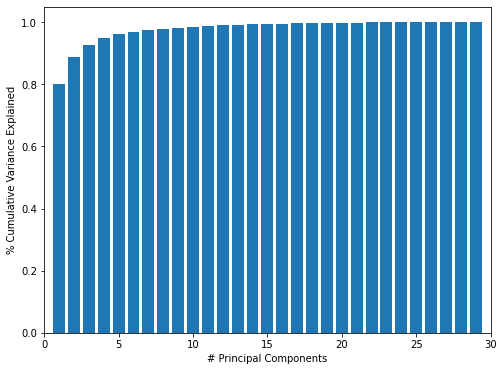

In [26]:
sample_data = pd.read_csv(win_path + '\\' + win_filenames[1]) 
n_components = 29

#For determining number of principal components
pca_test = PCA(n_components)
pca_test.fit(np.transpose(sample_data))
test_data2 = pca_test.transform(np.transpose(sample_data))

cum_exp_var = []
var_exp = 0
for i in pca_test.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,n_components + 1), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');
plt.xlim([0,30])

### Performing Principal Component Analysis on EEG data using five principal components as determined above

In [22]:
pca = UnsupervisedSpatialFilter(PCA(5), average=False)
pca_X = pca.fit_transform(X)

In [23]:
pca_X.shape
#(Samples,channels,timestamps)

(30441, 5, 600)

### Plotting dimensionally reduced EEG sample

Text(0, 0.5, 'Amplitude')

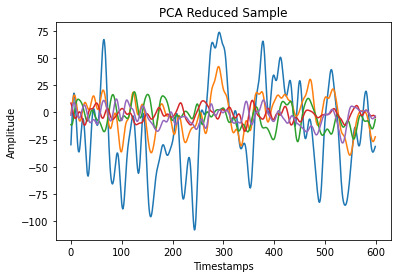

In [33]:
fig0 = plt.figure()
plt.plot(np.transpose(pca_X[0]))
plt.title('PCA Reduced Sample')
plt.xlabel('Timestamps')
plt.ylabel('Amplitude')

## Splitting data into training, testing and validation sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state = 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = 10)

## Checking label ratio of reduced dataset

([<matplotlib.axis.XTick at 0x210298b9f40>,
 [Text(0, 0, 'Lose'), Text(1, 0, 'Win')])

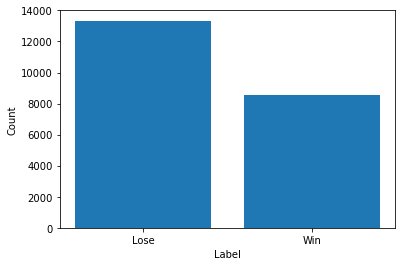

In [28]:
y_counts = collections.Counter(y_train)

fig3 = plt.figure(figsize=(6, 4))
plt.bar(y_counts.keys(), y_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0,1], ['Lose', 'Win'])

In [30]:
save_path = r'C:\Users\Andy Guevara\Projects\EEG Project'

np.save(save_path+'\\'+'X_train',X_train)
np.save(save_path+'\\'+'X_test',X_test)
np.save(save_path+'\\'+'X_val',X_val)
np.save(save_path+'\\'+'y_train',y_train)
np.save(save_path+'\\'+'y_test',y_test)
np.save(save_path+'\\'+'y_val',y_val)